# Урок 6. Многоклассовая классификация.

Посмотрим на примере алгоритма логистической регрессии и метода опорных векторов, как работать с различными методами многоклассовой классификации.

### 1.
Вспомните датасет Wine. Загрузите его, разделите на тренировочную и тестовую выборки (random_state=17), используя только [9, 11, 12] признаки.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [5]:
wine = load_wine()
X = wine.data[:,[9,11,12]]
y=wine.target
X.shape

(178, 3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, stratify=y)

**Задайте тип кросс-валидации с помощью StratifiedKFold: 5-кратная, random_state=17.**

In [7]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

### 2.
Обучите логистическую регрессию (LogisticRegression) с параметром C по умолчанию и random_state=17. Укажите гиперпараметр multi_class='ovr' - по умолчанию многие классификаторы используют именно его. С помощью cross_val_score сделайте кросс-валидацию (используйте объект skf) и выведите среднюю долю правильных ответов на ней (используйте функцию mean). Отдельно выведите долю правильных ответов на тестовой выборке.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression(multi_class='ovr',random_state=17)
cv_scores_lr = cross_val_score(log_reg,X_train,y_train,cv=skf)
print("Средняя точность (кросс-валидация, LogReg):", cv_scores_lr.mean())


Средняя точность (кросс-валидация, LogReg): 0.9319088319088319


In [9]:
log_reg.fit(X_train,y_train)
test_score_lr = log_reg.score(X_test,y_test)
print("Точность на тесте (LogReg):", test_score_lr)


Точность на тесте (LogReg): 0.9555555555555556


### 3.
Обучите метод опорных векторов (SVC) с random_state=17 и остальными параметрами по умолчанию. Этот метод при мультиклассовой классификации также использует метод "ovr". Сделайте кросс-валидацию (используйте skf) и, как и в предыдущем пункте, выведите среднюю долю правильных ответов на ней. Отдельно выведите долю правильных ответов на тестовой выборке.

In [10]:
from sklearn.svm import SVC
# SVM-классификатор
svc = SVC(random_state=17)

# Кросс-валидация
cv_scores_svc = cross_val_score(svc, X_train, y_train, cv=skf)
print("Средняя точность (кросс-валидация, SVC):", cv_scores_svc.mean())

# Обучение и проверка на тесте
svc.fit(X_train, y_train)
test_score_svc = svc.score(X_test, y_test)
print("Точность на тесте (SVC):", test_score_svc)


Средняя точность (кросс-валидация, SVC): 0.6760683760683761
Точность на тесте (SVC): 0.6888888888888889


Как видно из полученной метрики, на тестовой выборке метод с гиперпараметрами по умолчанию работает явно намного хуже логистической регрессии. В целом, SVM достаточно плохо масштабируется на размер обучающего набора данных (как видно, даже с тремя признаками он работает не очень хорошо), но благодаря возможности выбора различных ядер (функций близости, которые помогают разделять данные) и другим гиперпараметрам SVM можно достаточно точно настроить под определенный вид данных. Подробнее на этом останавливаться в контексте данного урока не будем.

### 4.
Для предсказаний обеих моделей постройте матрицу ошибок (confusion matrix) и напишите, какие классы каждая из моделей путает больше всего между собой.

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Предсказания
y_pred_lr = log_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)

# Матрицы ошибок
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svc = confusion_matrix(y_test, y_pred_svc)

print("Матрица ошибок (LogReg):")
print(cm_lr)

print("Матрица ошибок (SVC):")
print(cm_svc)

Матрица ошибок (LogReg):
[[14  1  0]
 [ 0 18  0]
 [ 0  1 11]]
Матрица ошибок (SVC):
[[12  0  3]
 [ 0 17  1]
 [ 0 10  2]]


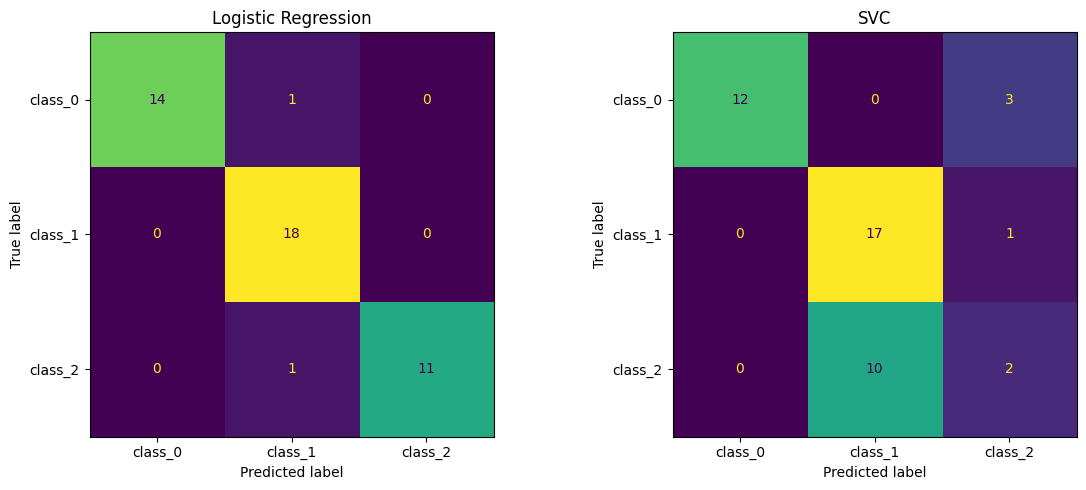

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig,axes = plt.subplots(1,2,figsize = (12,5))
ConfusionMatrixDisplay(cm_lr,display_labels=wine.target_names)\
    .plot(ax=axes[0],colorbar=False)
axes[0].set_title("Logistic Regression")
ConfusionMatrixDisplay(cm_svc, display_labels=wine.target_names)\
    .plot(ax=axes[1], colorbar=False)
axes[1].set_title("SVC")
plt.tight_layout()
plt.show()


### 5.
Для каждой модели выведите classification report.

In [15]:
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=wine.target_names))

print("Classification Report (SVC):")
print(classification_report(y_test, y_pred_svc, target_names=wine.target_names))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.97        15
     class_1       0.90      1.00      0.95        18
     class_2       1.00      0.92      0.96        12

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45

Classification Report (SVC):
              precision    recall  f1-score   support

     class_0       1.00      0.80      0.89        15
     class_1       0.63      0.94      0.76        18
     class_2       0.33      0.17      0.22        12

    accuracy                           0.69        45
   macro avg       0.65      0.64      0.62        45
weighted avg       0.67      0.69      0.66        45

